In [1]:
#You must include a written description of three observable trends based on the data.
#1. A large percentage of fares are from Urban areas (62.7%), followed by Suburban(30.5%), and Rural areas (6.8%). 
#2. Over 68% or rides were in Urban areas, followed by Suburban, and Rural areas. 
#3. Majority of drivers (over 80%) are also within Urban areas, followed by Suburban (16%) and Rural (2.6%) areas.

In [2]:
% matplotlib inline 

In [3]:
#import dependencies
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import seaborn as sns

In [4]:
#load csv files to pd 
f1 = 'city_data.csv'
f2 = 'ride_data.csv'

f1_pd = pd.read_csv(f1)
f2_pd = pd.read_csv(f2)

f1_pd.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [5]:
f2_pd.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,1/14/18 10:14,13.83,5.739410e+12
1,South Michelleport,3/4/18 18:24,30.24,2.343910e+12
2,Port Samanthamouth,2/24/18 4:29,33.44,2.005070e+12
3,Rodneyfort,2/10/18 23:22,23.44,5.149250e+12
4,South Jack,3/6/18 4:28,34.58,3.908450e+12


In [183]:
# Combine the data into a single dataset
# Display the data table for preview

data = pd.merge(f1_pd, f2_pd, how= 'outer', on = 'city')
data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2/24/18 8:40,13.93,5.628550e+12
1,Richardfort,38,Urban,2/13/18 12:46,14.00,9.100500e+11
2,Richardfort,38,Urban,2/16/18 13:52,17.92,8.206390e+11
3,Richardfort,38,Urban,2/1/18 20:18,10.26,9.554940e+12
4,Richardfort,38,Urban,4/17/18 2:26,23.00,7.200210e+11


In [268]:
 # Obtain the x and y coordinates for each of the three city types
    #group by city and type
grouped = data.groupby('city')

#number of rides per city #x-axis
ride_count = grouped['city'].count()

#average fare per city #y-axis
fare_ave = grouped['fare'].mean()

#types 
typess = grouped['type'].count()

#Total Number of Drivers Per City #circle size will correlate with number of drivers 
drive_type_cc = data.drop_duplicates(['city'], keep='first')
test300 = drive_type_cc.groupby(['city', 'type'])
count_drive_test = test300['driver_count'].sum()

#test_type = data.groupby('type', as_index=False).sum()


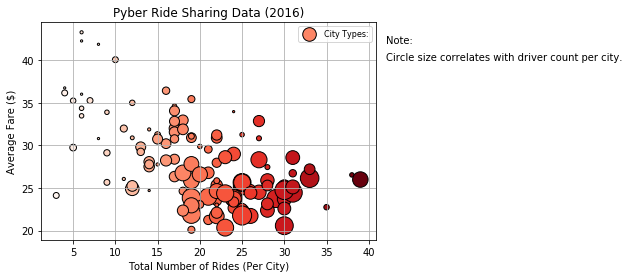

In [287]:
fig, ax = plt.subplots()
#colors = ['lightblue', 'gold', 'coral']
#colors = np.where(grouped['type']=='Urban','y','k')
#label = ['Urban', 'Rural', 'Suburban']
plot = plt.scatter(ride_count, fare_ave, s=count_drive_test*5, edgecolor = 'black', c=typess, cmap='Reds', label=labels)
ax.grid()

#annotate text 
text = 'Note: '
text2= 'Circle size correlates with driver count per city.'

plt.text(42,42, text)
plt.text(42,40, text2)
#plt.legend(handles=[one, two, three]

#title, labels, and save 
plt.title('Pyber Ride Sharing Data (2016)')
plt.ylabel('Average Fare ($)')
plt.xlabel('Total Number of Rides (Per City)')
#plt.legend('Urban', 'Rural', 'Suburban')
plt.savefig("Scatter.png")
plt.legend(
           ('City Types:', 'Urban', 'Rural', 'Suburban'),
           loc=1,
           ncol=3,
           fontsize=8)
plt.savefig("Scatter.png")

In [172]:
#% Fares by City Type
type_grouped = data.groupby('type')
fare_type = type_grouped['fare'].sum()
fare_tot = fare_type.sum()

fare_perc = (fare_type/fare_tot)*100
fare_perc.round(2)


type
Rural        6.81
Suburban    30.46
Urban       62.72
Name: fare, dtype: float64

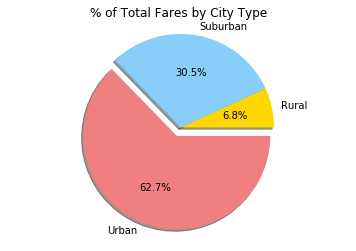

In [63]:
# Labels for the sections of our pie chart
labels = ['Rural', 'Suburban', 'Urban']

# The values of each section of the pie chart
sizes = fare_perc

# The colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=0)
plt.axis("equal")
plt.title("% of Total Fares by City Type")
plt.savefig("PyFare.png")


In [11]:
#% of Total Rides by City Type
ride_type = type_grouped['type'].count()
ride_tot = ride_type.sum()

ride_perc = (ride_type/ride_tot)*100
ride_perc.round(2)

type
Rural        5.26
Suburban    26.32
Urban       68.42
Name: type, dtype: float64

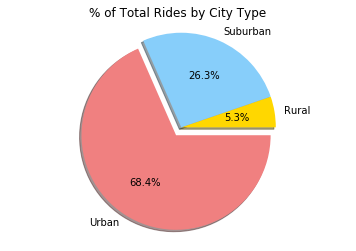

In [64]:
# Labels for the sections of our pie chart
labels = ['Rural', 'Suburban', 'Urban']

# The values of each section of the pie chart
sizes = ride_perc

# The colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=0)
plt.axis("equal")
plt.title("% of Total Rides by City Type")
plt.savefig("PyRide.png")


In [13]:
#% of Total Drivers by City Type
drive_type = data.drop_duplicates(['city'], keep='first')
drive_tot = drive_type['driver_count'].sum()
#drive_tot
type_grouped2 = drive_type.groupby('type')
drive_count = type_grouped2['driver_count'].sum()
drive_perc = drive_count/drive_tot
drive_perc



type
Rural       0.026236
Suburban    0.164817
Urban       0.808947
Name: driver_count, dtype: float64

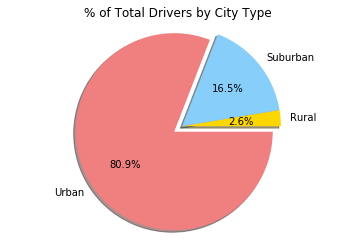

In [65]:
# Labels for the sections of our pie chart
labels = ['Rural', 'Suburban', 'Urban']

# The values of each section of the pie chart
sizes = drive_perc

# The colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=0)
plt.axis("equal")
plt.title("% of Total Drivers by City Type")
plt.savefig("PyDrive.png")
